In [284]:
import numpy as np
import pandas as pd
import re

In [285]:
# pd.set_option('display.max_colwidth',None)
# pd.set_option('display.max_rows',None)
# pd.set_option('display.max_columns',None)

In [286]:
df = pd.read_csv('gurgaon_properties_cleaned_v1.csv')

In [287]:
df.duplicated().sum()

121

In [288]:
df.head(1)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,flat,pareena mi casa,sector 68,1.9,9227.0,2059.0,Carpet area: 2059 (191.29 sq.m.),3,3,3+,servant room,1.0,NaN,Under Construction,"['Sector 55-56 Metro Station', 'Airia Mall', '...",[],"['Feng Shui / Vaastu Compliant', 'Security / F..."


## 1. areaWithType

In [289]:
df.sample(5)[['price','area','areaWithType']]

,price,area,areaWithType
2631,2.30,1479.0,Built Up area: 1479 (137.4 sq.m.)
573,0.56,822.0,Carpet area: 822 (76.37 sq.m.)
2933,2.75,1557.0,Plot area 173(144.65 sq.m.)
3456,2.95,2850.0,Built Up area: 3150 (292.64 sq.m.)Carpet area:...
1658,1.60,1150.0,Carpet area: 1150 (106.84 sq.m.)


In [290]:
# This function extracts the Super Built up area
def get_super_built_up_area(text):
    match = re.search(r'Super Built up area (\d+\.?\d*)',text)
    if match:
        return float(match.group(1))
    return None

In [291]:
# This function extracts the Built Up area or Carpet area
def get_area(text, area_type):
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)',text)
    if match:
        return float(match.group(1))
    return None

In [292]:
# This function checks if the area is provided in sq.m. and converts it to sqft if needed
def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value),text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639 # conversion factor from sq.m. to sqft
    return area_value

In [293]:
# Extract Super Built up area and convert to sqft if needed
df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'],x['super_built_up_area']),axis=1)

# Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x,'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'],x['built_up_area']),axis=1)

# Extract carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [294]:
df[['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
2632,1.59,flat,1920.0,Super Built up area 1920(178.37 sq.m.),1920.0,NaN,NaN
3713,2.10,flat,1260.0,Carpet area: 1260 (117.06 sq.m.),NaN,NaN,1260.00000
1579,0.24,flat,340.0,Carpet area: 340.09 (31.6 sq.m.),NaN,NaN,340.13924
3040,2.50,flat,1838.0,Super Built up area 1828(169.83 sq.m.),1828.0,NaN,NaN
2088,1.78,flat,1950.0,Super Built up area 1950(181.16 sq.m.)Built Up...,1950.0,1845.0,1530.00000


In [295]:
df.duplicated().sum()

121

In [296]:
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape

(534, 7)

In [297]:
df[df['areaWithType'].str.contains('Plot')][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].head(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
3,8.00,house,3600.0,Plot area 400(334.45 sq.m.),NaN,NaN,NaN
9,15.00,house,4500.0,Plot area 500(418.06 sq.m.),NaN,NaN,NaN
17,6.75,house,2088.0,Plot area 232(193.98 sq.m.),NaN,NaN,NaN
20,5.65,house,5400.0,Plot area 600(501.68 sq.m.),NaN,NaN,NaN
23,2.10,house,1215.0,Plot area 135(112.88 sq.m.),NaN,NaN,NaN


In [298]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft           19
area                     19
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1106
agePossession             1
nearbyLocations         178
furnishDetails          981
features                636
super_built_up_area    1889
built_up_area          2616
carpet_area            1860
dtype: int64

In [299]:
all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]

In [300]:
all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
3,8.00,house,3600.0,Plot area 400(334.45 sq.m.),NaN,NaN,NaN
9,15.00,house,4500.0,Plot area 500(418.06 sq.m.),NaN,NaN,NaN
17,6.75,house,2088.0,Plot area 232(193.98 sq.m.),NaN,NaN,NaN
20,5.65,house,5400.0,Plot area 600(501.68 sq.m.),NaN,NaN,NaN
23,2.10,house,1215.0,Plot area 135(112.88 sq.m.),NaN,NaN,NaN


In [301]:
all_nan_index = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].index

In [302]:
# Function to extract plot area from 'areaWithType' column
def extract_plot_area(area_with_type):
    match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
    return float(match.group(1)) if match else None

In [303]:
all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)

# Update the original dataframe
# gurgaon_properties.update(filtered_rows)

In [304]:
all_nan_df.sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
1184,5.00,house,3240.0,Plot area 360(301.01 sq.m.),NaN,360.0,NaN
2455,8.00,house,300.0,Plot area 300(27.87 sq.m.),NaN,300.0,NaN
1430,4.25,house,1836.0,Plot area 204(170.57 sq.m.),NaN,204.0,NaN
1313,10.30,house,3240.0,Plot area 360(301.01 sq.m.),NaN,360.0,NaN
1766,2.90,house,2500.0,Plot area 2500(232.26 sq.m.),NaN,2500.0,NaN


In [305]:
df.update(all_nan_df)

In [306]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft           19
area                     19
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1106
agePossession             1
nearbyLocations         178
furnishDetails          981
features                636
super_built_up_area    1889
built_up_area          2070
carpet_area            1860
dtype: int64

In [307]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area
0,flat,pareena mi casa,sector 68,1.90,9227.0,2059.0,Carpet area: 2059 (191.29 sq.m.),3,3,3+,servant room,1.0,NaN,Under Construction,"['Sector 55-56 Metro Station', 'Airia Mall', '...",[],"['Feng Shui / Vaastu Compliant', 'Security / F...",NaN,NaN,2059.0
1,flat,alpha corp gurgaonone,sector 84,2.28,8769.0,2600.0,Super Built up area 3434(319.03 sq.m.)Carpet a...,4,4,3+,servant room,8.0,South-East,1 to 5 Year Old,"['Delhi Public School', 'Raheja Market', 'Sapp...",NaN,"['Intercom Facility', 'Lift(s)', 'Maintenance ...",3434.0,NaN,2600.0
2,flat,m3m sierra 68,sector 68,1.10,8986.0,1224.0,Super Built up area 1224(113.71 sq.m.)Built Up...,2,2,3,not available,1.0,North-East,1 to 5 Year Old,"['Airia Mall', 'Sohna Road', 'Golf Course Exte...","['2 Wardrobe', '5 Fan', '1 Exhaust Fan', '2 Ge...","['Security / Fire Alarm', 'Power Back-up', 'Fe...",1224.0,1150.0,830.0
3,house,ireo victory valley4.0 ?,sector 67,8.00,22222.0,3600.0,Plot area 400(334.45 sq.m.),6,7,3+,"pooja room,study room,servant room,store room",3.0,North-East,5 to 10 Year Old,"['AIPL Joy Street Mall', 'Golf Course Extensio...","['6 Wardrobe', '1 Water Purifier', '1 Exhaust ...","['Security / Fire Alarm', 'Feng Shui / Vaastu ...",NaN,400.0,NaN
4,flat,kiran residency,sector 56,1.54,8324.0,1850.0,Super Built up area 2000(185.81 sq.m.)Built Up...,3,4,3+,servant room,5.0,South,10+ Year Old,"['Sector metro station', 'Sector metro station...","['3 Wardrobe', '5 Fan', '1 Exhaust Fan', '3 Ge...","['Feng Shui / Vaastu Compliant', 'Lift(s)', 'H...",2000.0,1900.0,1850.0


## 2.additionalRoom

In [308]:
df['additionalRoom'].value_counts()

additionalRoom
not available                                    1588
servant room                                      705
study room                                        250
others                                            225
pooja room                                        165
                                                 ... 
others,study room                                   1
servant room,pooja room,store room,study room       1
servant room,study room,others                      1
study room,others,servant room                      1
pooja room,store room,servant room                  1
Name: count, Length: 65, dtype: int64

In [309]:
# additional room
# List of new columns to be created 

new_cols = ['study room' , 'servant room' , 'store room' , 'pooja room' , 'others']

# Populate the new columns based on the "additionalRoom" column
for col in new_cols:
    df[col] = df['additionalRoom'].str.contains(col).astype(int)

In [310]:
df.sample(5)[['additionalRoom','study room', 'servant room', 'store room', 'pooja room', 'others']]

,additionalRoom,study room,servant room,store room,pooja room,others
2458,servant room,0,1,0,0,0
1595,"pooja room,others",0,0,0,1,1
3048,not available,0,0,0,0,0
1113,servant room,0,1,0,0,0
3343,servant room,0,1,0,0,0


In [311]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,pareena mi casa,sector 68,1.90,9227.0,2059.0,Carpet area: 2059 (191.29 sq.m.),3,3,3+,...,[],"['Feng Shui / Vaastu Compliant', 'Security / F...",NaN,NaN,2059.0,0,1,0,0,0
1,flat,alpha corp gurgaonone,sector 84,2.28,8769.0,2600.0,Super Built up area 3434(319.03 sq.m.)Carpet a...,4,4,3+,...,NaN,"['Intercom Facility', 'Lift(s)', 'Maintenance ...",3434.0,NaN,2600.0,0,1,0,0,0
2,flat,m3m sierra 68,sector 68,1.10,8986.0,1224.0,Super Built up area 1224(113.71 sq.m.)Built Up...,2,2,3,...,"['2 Wardrobe', '5 Fan', '1 Exhaust Fan', '2 Ge...","['Security / Fire Alarm', 'Power Back-up', 'Fe...",1224.0,1150.0,830.0,0,0,0,0,0
3,house,ireo victory valley4.0 ?,sector 67,8.00,22222.0,3600.0,Plot area 400(334.45 sq.m.),6,7,3+,...,"['6 Wardrobe', '1 Water Purifier', '1 Exhaust ...","['Security / Fire Alarm', 'Feng Shui / Vaastu ...",NaN,400.0,NaN,1,1,1,1,0
4,flat,kiran residency,sector 56,1.54,8324.0,1850.0,Super Built up area 2000(185.81 sq.m.)Built Up...,3,4,3+,...,"['3 Wardrobe', '5 Fan', '1 Exhaust Fan', '3 Ge...","['Feng Shui / Vaastu Compliant', 'Lift(s)', 'H...",2000.0,1900.0,1850.0,0,1,0,0,0


## 3.agePossession

In [312]:
df['agePossession'].value_counts()

agePossession
1 to 5 Year Old       1676
5 to 10 Year Old       575
0 to 1 Year Old        530
undefined              333
10+ Year Old           310
Under Construction      90
Within 6 months         70
Within 3 months         26
Dec 2023                22
By 2023                 19
By 2024                 17
Dec 2024                16
Mar 2024                14
Oct 2024                 8
Jan 2024                 8
Aug 2023                 7
Jun 2024                 7
Dec 2025                 7
Nov 2023                 5
Sep 2023                 4
Jul 2024                 4
Oct 2023                 4
Aug 2024                 4
By 2025                  4
May 2024                 3
Feb 2024                 3
Jan 2025                 3
Nov 2024                 3
Dec 2026                 2
By 2027                  2
Mar 2025                 2
Jul 2027                 2
Aug 2025                 2
Apr 2026                 2
Jan 2026                 2
Jul 2025                 2
Jun 2027      

In [313]:
df['agePossession'].sample(5)

690        10+ Year Old
1880    1 to 5 Year Old
2026    0 to 1 Year Old
353     1 to 5 Year Old
1050           Apr 2024
Name: agePossession, dtype: object

In [314]:
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # For entries like 'May 2024'
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"


In [315]:
df['agePossession'] = df['agePossession'].apply(categorize_age_possession)

In [316]:
df['agePossession'].value_counts()

agePossession
Relatively New        1676
New Property           626
Moderately Old         575
Undefined              334
Old Property           310
Under Construction     283
Name: count, dtype: int64

In [317]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,pareena mi casa,sector 68,1.90,9227.0,2059.0,Carpet area: 2059 (191.29 sq.m.),3,3,3+,...,[],"['Feng Shui / Vaastu Compliant', 'Security / F...",NaN,NaN,2059.0,0,1,0,0,0
1,flat,alpha corp gurgaonone,sector 84,2.28,8769.0,2600.0,Super Built up area 3434(319.03 sq.m.)Carpet a...,4,4,3+,...,NaN,"['Intercom Facility', 'Lift(s)', 'Maintenance ...",3434.0,NaN,2600.0,0,1,0,0,0
2,flat,m3m sierra 68,sector 68,1.10,8986.0,1224.0,Super Built up area 1224(113.71 sq.m.)Built Up...,2,2,3,...,"['2 Wardrobe', '5 Fan', '1 Exhaust Fan', '2 Ge...","['Security / Fire Alarm', 'Power Back-up', 'Fe...",1224.0,1150.0,830.0,0,0,0,0,0
3,house,ireo victory valley4.0 ?,sector 67,8.00,22222.0,3600.0,Plot area 400(334.45 sq.m.),6,7,3+,...,"['6 Wardrobe', '1 Water Purifier', '1 Exhaust ...","['Security / Fire Alarm', 'Feng Shui / Vaastu ...",NaN,400.0,NaN,1,1,1,1,0
4,flat,kiran residency,sector 56,1.54,8324.0,1850.0,Super Built up area 2000(185.81 sq.m.)Built Up...,3,4,3+,...,"['3 Wardrobe', '5 Fan', '1 Exhaust Fan', '3 Ge...","['Feng Shui / Vaastu Compliant', 'Lift(s)', 'H...",2000.0,1900.0,1850.0,0,1,0,0,0


## 4.FurnishDetails

In [318]:
df.sample(5)[['furnishDetails','features']]

,furnishDetails,features
2307,"['3 Wardrobe', '1 Water Purifier', '5 Fan', '1...","['Feng Shui / Vaastu Compliant', 'Security / F..."
3266,"['8 Wardrobe', '11 Light', '1 Modular Kitchen'...","['Water purifier', 'Centrally Air Conditioned'..."
2605,"['1 Fan', '1 Geyser', '1 Light', 'No AC', 'No ...","['Feng Shui / Vaastu Compliant', 'Security / F..."
1126,"['1 Wardrobe', '1 Modular Kitchen', 'No AC', '...","['Lift(s)', 'Park', 'Maintenance Staff', 'Visi..."
571,"['11 Wardrobe', '7 Fan', '1 Exhaust Fan', '11 ...","['Feng Shui / Vaastu Compliant', 'Maintenance ..."


In [319]:
# Extract all unique furnishings from the furnishDetails column

all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[','').replace(']','').replace("'","").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
        return 0

# Simplify the furnishing list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+','', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include)) # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing] # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]

<>:14: SyntaxWarning: invalid escape sequence '\d'
<>:14: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Mr\AppData\Local\Temp\ipykernel_13960\2513140103.py:14: SyntaxWarning: invalid escape sequence '\d'
  pattern = re.compile(f"(\d+) {furnishing}")


In [320]:
furnishings_df.shape

(3804, 19)

In [321]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

C:\Users\Mr\AppData\Local\Temp\ipykernel_13960\114705885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


In [322]:
furnishings_df.sample(5)

,Geyser,Bed,Washing Machine,Curtains,Microwave,Wardrobe,Exhaust Fan,Light,TV,Chimney,Fan,AC,Sofa,Fridge,Dining Table,Water Purifier,Modular Kitchen,Stove
3633,0.0,0.0,1.0,1.0,1.0,4.0,1.0,0.0,0.0,1.0,4.0,6.0,0.0,1.0,0.0,0.0,1.0,0.0
2370,1.0,0.0,0.0,0.0,0.0,2.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3629,2.0,0.0,0.0,0.0,0.0,3.0,1.0,7.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1984,0.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [323]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [324]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)
scaled_data

array([[-0.61820299, -0.13835672, -0.25550542, ..., -0.39139018,
        -1.08314826, -0.45489124],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [ 0.18418186, -0.13835672, -0.25550542, ..., -0.39139018,
         0.92323464,  2.19832769],
       ...,
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [-0.21701057, -0.13835672, -0.25550542, ..., -0.39139018,
         0.92323464, -0.45489124],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])

In [325]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
scaled_data = imputer.fit_transform(scaled_data)

In [326]:
wcss_reduced = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

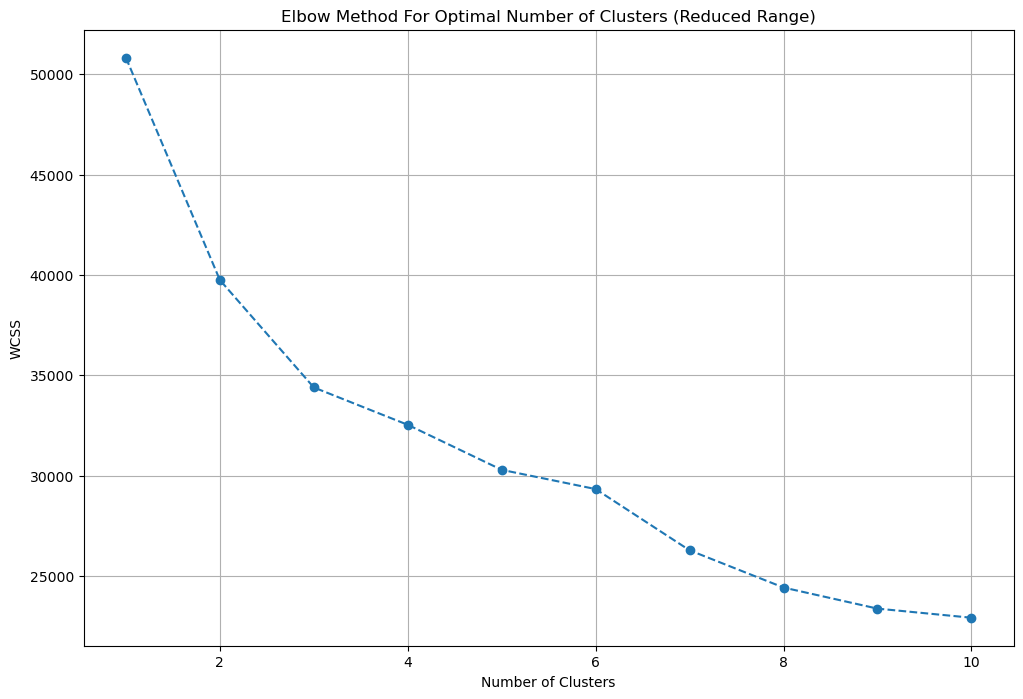

In [327]:
# Plot the results
plt.figure(figsize=(12,8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [328]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row 
cluster_assignments = kmeans.predict(scaled_data)

In [329]:
df = df.iloc[:, :-18]

In [330]:
df['furnishing_type'] = cluster_assignments

In [331]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'additionalRoom',
       'floorNum', 'facing', 'agePossession', 'nearbyLocations',
       'furnishDetails', 'features', 'super_built_up_area', 'built_up_area',
       'carpet_area', 'study room', 'servant room', 'store room', 'pooja room',
       'others', 'furnishing_type'],
      dtype='object')

In [332]:
df.sample(5)[['furnishDetails','furnishing_type']]

# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnished

,furnishDetails,furnishing_type
657,[],0
2785,[],0
2290,"['9 Fan', '5 Wardrobe', 'No AC', 'No Bed', 'No...",0
627,"['7 Fan', '1 Exhaust Fan', '2 Geyser', '10 Lig...",1
2271,NaN,0


## 5. features

In [333]:
df[['society','features']].sample(5)

,society,features
2497,naman residency,"['Visitor Parking', 'Rain Water Harvesting']"
1884,bptp terra,"['Security / Fire Alarm', 'Lift(s)', 'Water St..."
3587,dlf city plot phase 3,NaN
3080,godrej habitat,NaN
3417,godrej summit,"['Security / Fire Alarm', 'Feng Shui / Vaastu ..."


In [334]:
df['features'].isnull().sum()

636

In [335]:
import pandas as pd

app_df = pd.read_csv('apartments.csv', encoding='latin1')
app_df.head(2)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,Smartworld One DXP,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Pa...","{'Bajghera Road': '800 Meter', 'Palam Vihar Ha...",https://www.99acres.com/smartworld-one-dxp-sec...,"{'2 BHK': {'building_type': 'Apartment', 'area...","['Swimming Pool', 'Salon', 'Restaurant', 'Spa'..."
1,M3M Crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap Un...","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The N...",https://www.99acres.com/m3m-crown-sector-111-g...,"{'3 BHK': {'building_type': 'Apartment', 'area...","['Bowling Alley', 'Mini Theatre', 'Manicured G..."


In [336]:
app_df['PropertyName'] = app_df['PropertyName'].str.lower()

In [337]:
temp_df = df[df['features'].isnull()]

In [338]:
temp_df.shape

(636, 26)

In [339]:
x = temp_df.merge(app_df, left_on='society',right_on='PropertyName',how='left')['TopFacilities']

In [340]:
df.loc[temp_df.index,'features'] = x.values

In [341]:
df["features"]

0       ['Feng Shui / Vaastu Compliant', 'Security / F...
1       ['Intercom Facility', 'Lift(s)', 'Maintenance ...
2       ['Security / Fire Alarm', 'Power Back-up', 'Fe...
3       ['Security / Fire Alarm', 'Feng Shui / Vaastu ...
4       ['Feng Shui / Vaastu Compliant', 'Lift(s)', 'H...
                              ...                        
3799                                                  NaN
3800    ['Water Storage', 'No open drainage around', '...
3801    ['Security / Fire Alarm', 'Lift(s)', 'Maintena...
3802    ['Security / Fire Alarm', 'Lift(s)', 'Maintena...
3803                    ['Club house / Community Center']
Name: features, Length: 3804, dtype: object

In [342]:
df['features'].isnull().sum()

488

In [343]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [ ]:
# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [ ]:
features_binary_df.sample(5)

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Air Hockey,Airy Rooms,Amphitheatre,Automated Car Wash,Badminton Court,...,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
1800,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2210,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
2177,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,1,1,0,0
2204,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
3677,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0


In [ ]:
features_binary_df.shape

(3804, 130)

In [ ]:
wcss_reduced = []

for i in range(1 , 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)

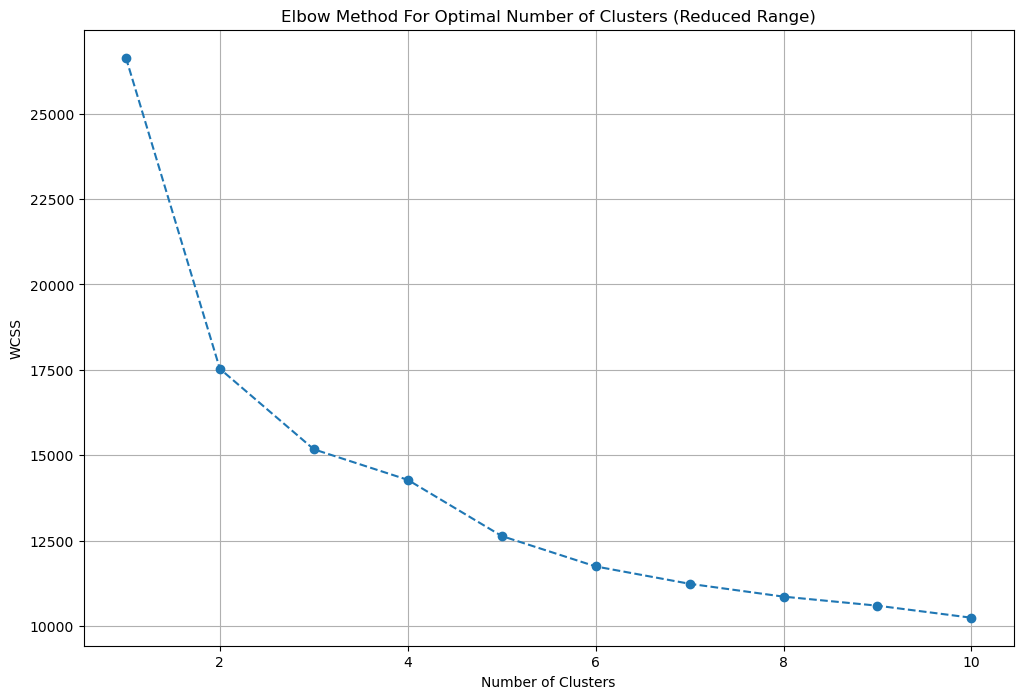

In [ ]:
# Plot the results
plt.figure(figsize=(12,8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [ ]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}

# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)

In [ ]:
df['luxury_score'] = luxury_score

In [ ]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
0,flat,pareena mi casa,sector 68,1.90,9227.0,2059.0,Carpet area: 2059 (191.29 sq.m.),3,3,3+,...,NaN,2059.0,0,1,0,0,0,0,"[Feng Shui / Vaastu Compliant, Security / Fire...",49
1,flat,alpha corp gurgaonone,sector 84,2.28,8769.0,2600.0,Super Built up area 3434(319.03 sq.m.)Carpet a...,4,4,3+,...,NaN,2600.0,0,1,0,0,0,0,"[Intercom Facility, Lift(s), Maintenance Staff...",61
2,flat,m3m sierra 68,sector 68,1.10,8986.0,1224.0,Super Built up area 1224(113.71 sq.m.)Built Up...,2,2,3,...,1150.0,830.0,0,0,0,0,0,1,"[Security / Fire Alarm, Power Back-up, Feng Sh...",127
3,house,ireo victory valley4.0 ?,sector 67,8.00,22222.0,3600.0,Plot area 400(334.45 sq.m.),6,7,3+,...,400.0,NaN,1,1,1,1,0,1,"[Security / Fire Alarm, Feng Shui / Vaastu Com...",151
4,flat,kiran residency,sector 56,1.54,8324.0,1850.0,Super Built up area 2000(185.81 sq.m.)Built Up...,3,4,3+,...,1900.0,1850.0,0,1,0,0,0,0,"[Feng Shui / Vaastu Compliant, Lift(s), High C...",98


In [ ]:
# cols to drop -> nearbyLocation, furnishDetails, features, features_list, additionalRoom
df.drop(columns=['nearbyLocations', 'furnishDetails','features','features_list','additionalRoom'], inplace=True)

In [ ]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1958,house,eros rosewood city4.0 ?,sector 49,4.05,20769.0,1950.0,Plot area 1710(158.86 sq.m.)Built Up area: 200...,3,3,3,...,NaN,2000.0,1950.0,0,1,1,0,0,0,46
922,flat,shree vardhman victoria,sector 70,1.64,8410.0,1950.0,Super Built up area 1950(181.16 sq.m.)Carpet a...,3,5,3,...,1950.0,NaN,1161.0,0,1,0,0,0,0,126
673,flat,nbcc heights,sector 89,1.50,7058.0,2125.0,Super Built up area 2125(197.42 sq.m.),3,3,3,...,2125.0,NaN,NaN,1,1,0,0,0,0,105
751,flat,shree vardhman flora,sector 90,0.96,5120.0,1875.0,Super Built up area 1875(174.19 sq.m.),3,4,3,...,1875.0,NaN,NaN,0,1,0,0,0,0,106
1724,flat,tulip violet,sector 69,3.25,10105.0,3216.0,Super Built up area 3216(298.78 sq.m.),4,5,3+,...,3216.0,NaN,NaN,0,0,0,1,1,0,20


In [ ]:
df.shape

(3804, 23)

In [ ]:
df.to_csv('gurgaon_properties_cleaned_v2.csv',index=False)